<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
!pip install numpy pandas
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


#### Read the dataset in the csv file from the URL


In [7]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [ ]:
np.shape(boston_df)


(506, 14)

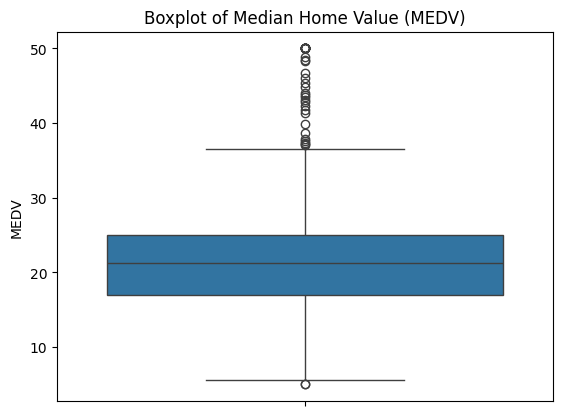

In [ ]:
#1) For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(y='MEDV',data=boston_df)
plt.title('Boxplot of Median Home Value (MEDV)')
plt.ylabel('MEDV')
plt.show()

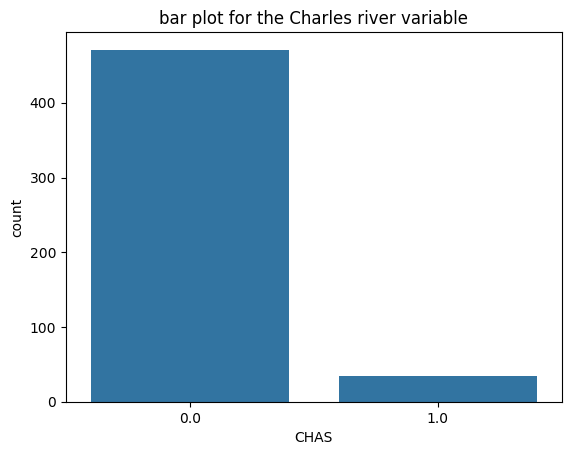

In [ ]:
#2) Provide a  bar plot for the Charles river variable
sns.countplot(x='CHAS',data=boston_df)
plt.title('bar plot for the Charles river variable')
plt.xlabel('CHAS')
plt.show()

In [ ]:
boston_df['age_groupes']

0      between 35 and 70 years 
1            70 years and older
2      between 35 and 70 years 
3      between 35 and 70 years 
4      between 35 and 70 years 
                 ...           
501    between 35 and 70 years 
502          70 years and older
503          70 years and older
504          70 years and older
505          70 years and older
Name: age_groupes, Length: 506, dtype: category
Categories (3, object): ['35 years and younger' < 'between 35 and 70 years ' < '70 years and older']

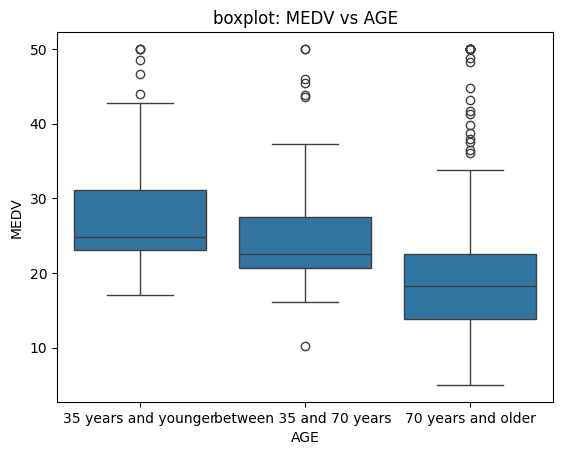

In [ ]:
#3) Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

my_bins=[0,35,70,100]
my_labels=['35 years and younger', 'between 35 and 70 years ','70 years and older']
boston_df['age_groupes']=pd.cut(boston_df['AGE'],bins=my_bins,labels=my_labels)

sns.boxplot(x='age_groupes',y='MEDV',data=boston_df)
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('boxplot: MEDV vs AGE')
plt.show()

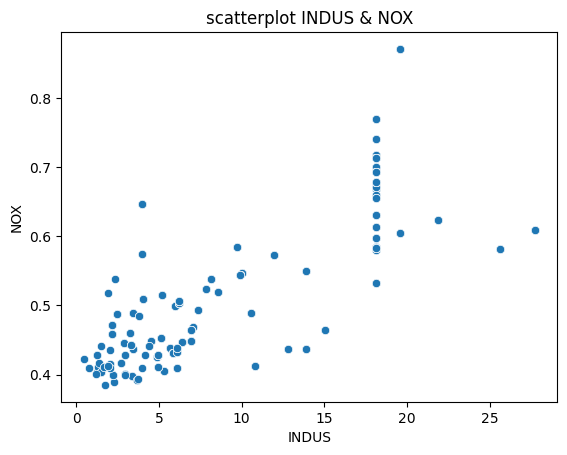

In [ ]:
#4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion
#of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x='INDUS',y='NOX',data=boston_df)
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('scatterplot INDUS & NOX')
plt.show()
# As INDUS increases, NOX tends to increase

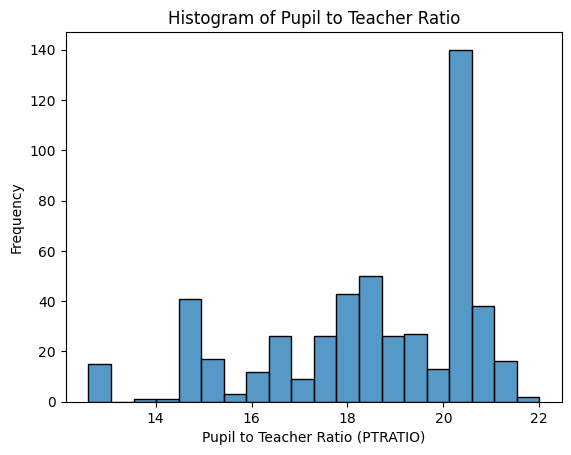

In [ ]:
#5) Create a histogram for the pupil to teacher ratio variable

sns.histplot(boston_df['PTRATIO'],bins=20,kde=False)
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.show()

In [ ]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Welch’s t-test (default for modern analysis)
t_stat, p_val = scipy.stats.ttest_ind(group1, group0, equal_var=False) #false because it s not the same variable !
print(t_stat, p_val)

3.113291312794837 0.003567170098137517


In [ ]:
from scipy.stats import levene

# Check whether two or more groups have equal variances (homogeneity of variance)
stat, p = levene(group1, group0)
print(f"Levene test p-value: {p}")

Levene test p-value: 0.03263097600633006


In [ ]:
"""
 Is there a difference in Median values of houses (MEDV) for each proportion of owner
occupied units built prior to 1940 (AGE)?
"""

under_35=boston_df[boston_df['age_groupes']=='35 years and younger']['MEDV']
between_35_and_70=boston_df[boston_df['age_groupes']=='between 35 and 70 years ']['MEDV']
more_than_70=boston_df[boston_df['age_groupes']=='70 years and older']['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(under_35, between_35_and_70, more_than_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# p-value < 0.05 so we reject H0 : there is a difference in the Median of houses for each age classe !

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [ ]:
model = ols('MEDV ~ C(age_groupes)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq     df         F        PR(>F)
C(age_groupes)   5401.731883    2.0  36.40765  1.710501e-15
Residual        37314.563532  503.0       NaN           NaN


In [ ]:
"""
 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion
of non-retail business acres per town? 
"""

scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
"""
 What is the impact of an additional weighted distance  to the five Boston employment 
centres on the median value of owner occupied homes? (Regression analysis)
"""

X = boston_df['DIS']           # Independent variable
y = boston_df['MEDV']          # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# p-value < 0.05 so we reject H0 : there is a correlation 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        22:16:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
# Linear regression
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        22:13:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0